## Project 2 - Task 2 (Part B) (IoTA Fall 2016)
### Polynomial Regression Analysis
#### student_id : *avshirod*

In [33]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import os

In [34]:
filename = 'p2.csv'
data = pd.read_csv(filename)
header = list(data.columns.values)
regr = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
dirpath = os.getcwd() + "/task2"

In [84]:
# for val in header[:-1]:
def analyze(val):
    x_1 = data[[val]]
    x_2 = x_1 ** 2
    x = x_1 + x_2
    # x = sm.add_constant(x)
    y = data[['Y']]
    result_lr = smf.ols(formula = "y ~ x", data=data).fit()
    result = smf.ols(formula = "y ~ x + x_2", data=data).fit()
    print(result.params)
    print(result.summary())
    
    regr.fit(x,y)
    regr2.fit(x_1,y)
    plt.scatter(x, y,  color='black', alpha = 0.45)
    # data.plot(kind = 'scatter', x = val, y = 'Y')
    plt.plot(x, regr.predict(x), color='blue', linewidth=3)
    # plt.plot(x_1, regr2.predict(x_1), color='red', linewidth = 3)
    # plt.plot(x+x_2, regr2.predict(x_2), color='blue', alpha = 0.5)
    plt.xlabel(str(val))
    plt.ylabel("Y")
    plt.title("Regression Line for " + str(val) + " vs. Y")
    # plt.legend(['Fitted Model PolyRegr', 'Fitted Model LinReg', 'Data'])
    plt.legend(['Fitted Model PolyRegr', 'Data'])
    plt.show()
    # fig_path_regline = dirpath + "/plots/regline_" + val
    # plt.savefig(fig_path_regline)
    plt.gcf().clear()

    residuals = result.resid_pearson
    qqp = sm.qqplot(residuals, loc=0)
    # fig_path_qqplot = dirpath + "/plots/qqplot_" + val
    plt.xlabel(str(val))
    plt.ylabel("Y")
    plt.title("QQ Plot for Residuals")
    plt.show(qqp)
    # plt.savefig(fig_path_qqplot)
    plt.gcf().clear()

    # pd.DataFrame.hist(residuals)
    plt.hist(list(residuals))
    # fig_path_histres = dirpath + "/plots/histres_" + val
    plt.xlabel(str(val))
    plt.ylabel("Y")
    plt.title("Histogram for Residuals of " + str(val))
    plt.show()
    # plt.savefig(fig_path_histres)
    plt.gcf().clear()
    
    chires = stats.chisquare(f_obs = residuals)
    # chires = stats.chi2_contingency(residuals)
    print("\nChi Square Test")
    print(chires)
    
    plt.scatter(list(x.values.flatten()), list(y.values.flatten()), residuals)
    # fig_path_scatres = dirpath + "/plots/scatres_" + val
    plt.xlabel(str(val))
    plt.ylabel("Y")
    plt.title("ScatterPlot for Residuals of " + str(val))
    plt.show()
    # plt.savefig(fig_path_scatres)
    plt.gcf().clear()
    
    print("Y = {} + {} * {}".format(result.params[0], result.params[1], val))
    print("s^2 (SSE) = {}".format(result.mse_resid))
    print("s^2 (SST) = {}".format(result.mse_total))
    print("R^2 = {}".format(result.rsquared))
    print("F-value = {}".format(result.fvalue))

Intercept    20.759100
x             0.102871
x_2          -0.102750
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     785.8
Date:                Wed, 19 Oct 2016   Prob (F-statistic):          1.26e-154
Time:                        22:58:22   Log-Likelihood:                -2481.2
No. Observations:                 500   AIC:                             4968.
Df Residuals:                     497   BIC:                             4981.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------

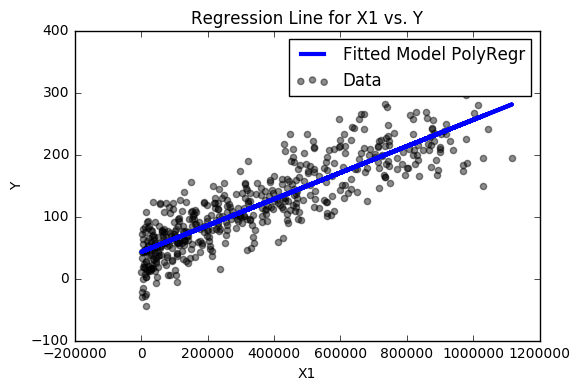

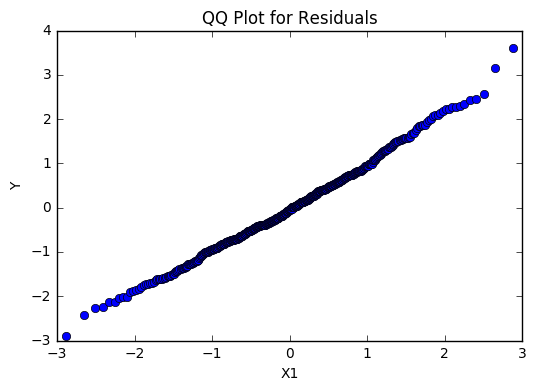

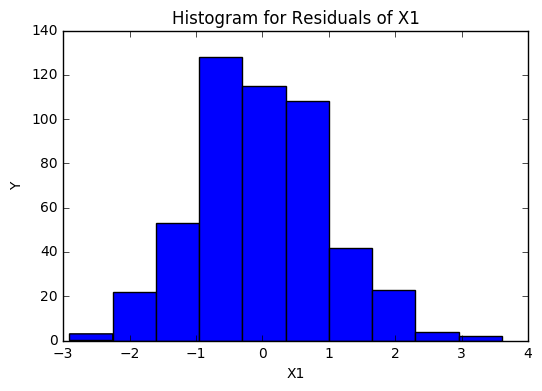


Chi Square Test
Power_divergenceResult(statistic=2586182251239933.0, pvalue=0.0)


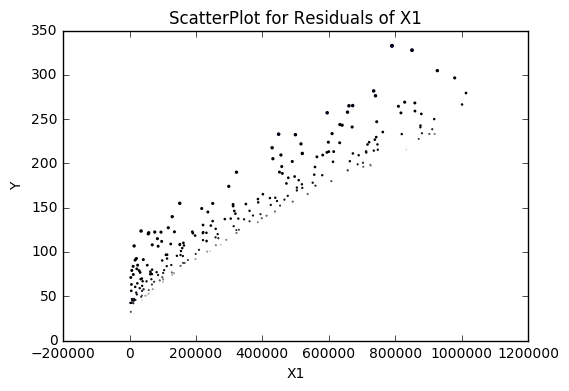

Y = 20.759100136394462 + 0.10287079596024716 * X1
s^2 (SSE) = 1203.6404068045038
s^2 (SST) = 4989.674114548346
R^2 = 0.7597405824036054
F-value = 785.7986863368186


In [85]:
analyze('X1')

## **Polynomial Regression Analysis for X1**
--------------------------------------------

From above results above,

p-value for *X1* and *X1^2* is < 0.05 (value = 0.001). Hence both the variables contribute significantly to predicting *Y*.

Value of R^2 is 0.760, which is an improvement over R^2 for linear model (value = 0.747). That means that model is an improved fit.
This can be seen from the regression line.

The p-value of the F-test is very low (close to zero). This reiterates that *X1 + X1^2* does contribute to *Y*.

The Q-Q plot is linear, indicating that residuals are normally distributed.
The histogram of residuals shows that the residual distribution has mean 0 and a low variance.
The scatter plot of residuals has a pattern, meaning that the model lacks some accuracy.